<a href="https://colab.research.google.com/github/Akiyoshi-Yagi/deepLearning/blob/master/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

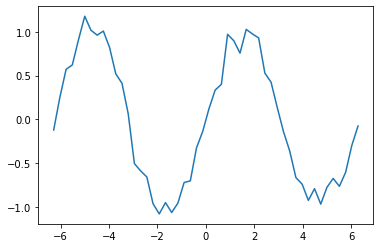

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi)
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data))

plt.plot(x_data, sin_data)
plt.show()


In [2]:
n_rnn = 10 #時系列数(各サンプルに含まれる時系列データの数))
n_sample = len(x_data)-n_rnn #サンプル数
x = np.zeros((n_sample, n_rnn)) #入力
t = np.zeros((n_sample, n_rnn)) #正解
for i in range(0, n_sample):
    x[i] = sin_data[i:i+n_rnn]
    t[i] = sin_data[i+1:i+n_rnn+1]  # 時系列を入力よりも一つ後にずらす

x = x.reshape(n_sample, n_rnn, 1)  # KerasにおけるRNNでは、入力を（サンプル数、時系列の数、入力層のニューロン数）にする
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)  # 今回は入力と同じ形状
print(t.shape)

(40, 10, 1)
(40, 10, 1)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
batch_size = 8
n_in = 1
n_mid = 20
n_out = 1

model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, n_in),return_sequences=True))
model_lstm.add(Dense(n_out,activation="linear"))
model_lstm.compile(loss="mean_squared_error", optimizer="sgd")
print(model_lstm.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 20)            1760      
_________________________________________________________________
dense_1 (Dense)              (None, 10, 1)             21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
import time

epochs = 1000

start_time = time.time()
history_lstm = model_lstm.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print("learnig time is" + str(time.time() - start_time))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








learnig time is39.42933440208435
